In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from cassandrautils import *

## WEATHER FORECAST

In [49]:
weatherDF = getDF(WEATHER_TABLE)
weatherDF['forecast_timestamp'] = pd.to_datetime(weatherDF['forecastdate'], format="%d-%m-%Y %H:%M")
weatherDF.sort_values('forecastdate')
K_TO_C = -273.15 

weatherDF.head(10)
# print("Weather from ", weather['forecast_timestamp'].min(), " To ", weather['forecast_timestamp'].max())
# print(weather)


,location,forecastdate,description,feels_like,humidity,pressure,sunrise,sunset,temp,temp_max,temp_min,wind,forecast_timestamp
0,Ho Chi Minh,2024-11-22 10:30:03,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,4.02,2024-11-22 10:30:03
1,Ho Chi Minh,2024-11-22 10:30:24,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,4.02,2024-11-22 10:30:24
2,Ho Chi Minh,2024-11-22 10:30:44,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,4.02,2024-11-22 10:30:44
3,Ho Chi Minh,2024-11-22 10:31:05,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,4.02,2024-11-22 10:31:05
4,Ho Chi Minh,2024-11-22 10:31:25,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:31:25
5,Ho Chi Minh,2024-11-22 10:31:45,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:31:45
6,Ho Chi Minh,2024-11-22 10:32:06,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:32:06
7,Ho Chi Minh,2024-11-22 10:32:26,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:32:26
8,Ho Chi Minh,2024-11-22 10:32:46,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:32:46
9,Ho Chi Minh,2024-11-22 10:33:07,light rain,310.25,67.0,1007.0,1732229522,1732271236,304.299988,305.160004,304.299988,3.60,2024-11-22 10:33:07


Text(0.5, 1.0, 'Recorded temperature in Ho Chi Minh (Kelvin)')

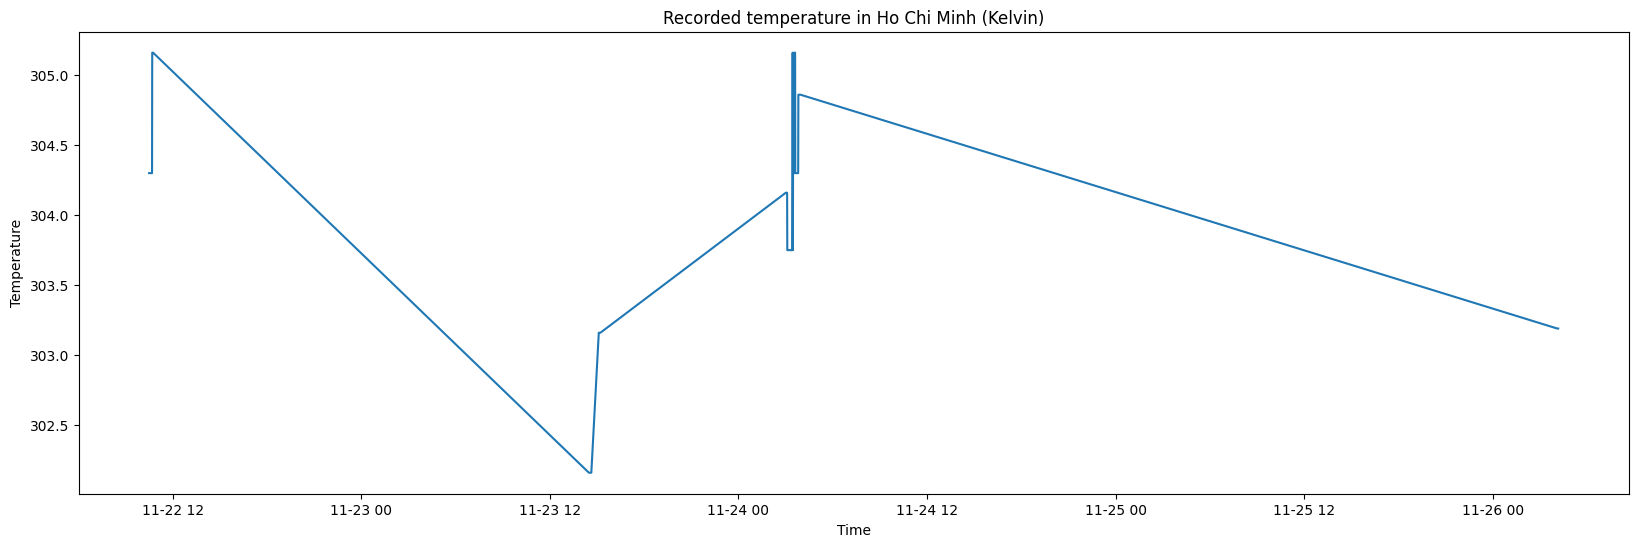

In [50]:
location_1 = 'Ho Chi Minh'
df_1 = weatherDF[weatherDF['location'] == location_1]

plt.figure(figsize=(20,6))
plt.plot(df_1['forecast_timestamp'], df_1['temp'])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title(f'Recorded temperature in {location_1} (Kelvin)')

Text(0.5, 1.0, 'Recorded temperature in Melbourne (Celcisus)')

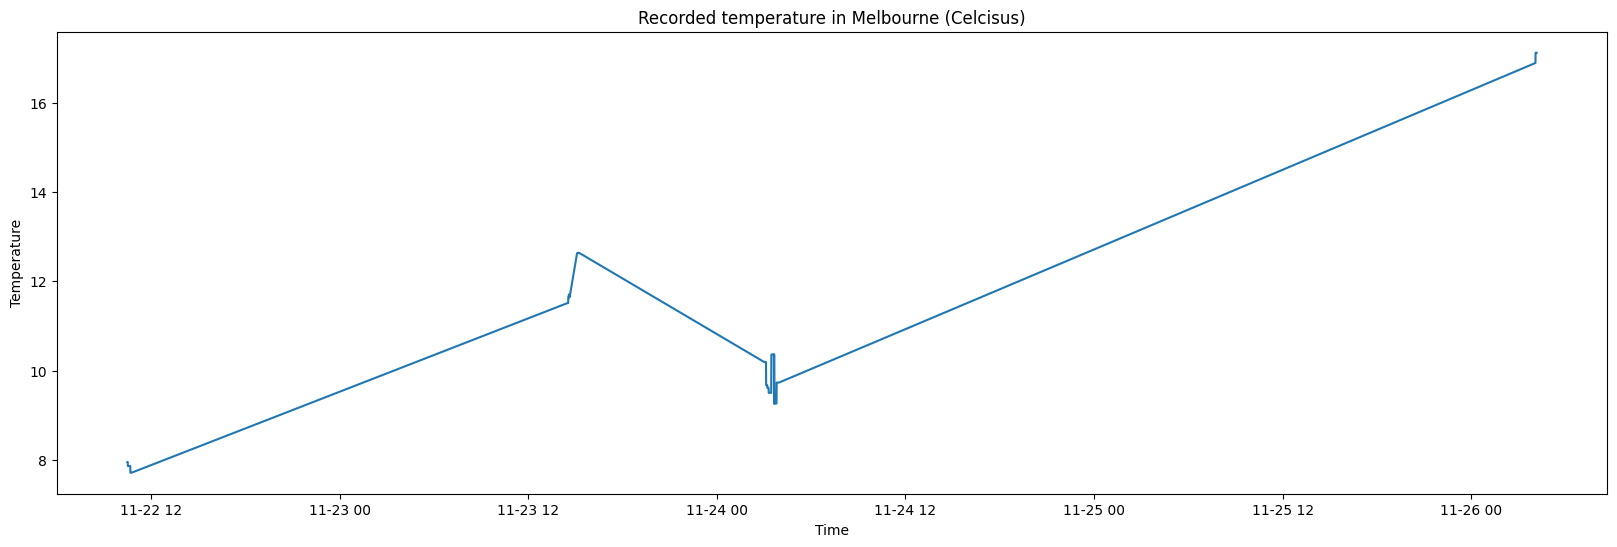

In [51]:
location_2 = 'Melbourne'
col = 'feels_like'

df_2 = weatherDF[weatherDF['location'] == location_2].copy()
df_2[col] = df_2[col] + K_TO_C

plt.figure(figsize=(20,6))
plt.plot(df_2['forecast_timestamp'], df_2[col])
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title(f'Recorded temperature in {location_2} (Celcisus)')

## FAKER API VISUALIZATION

In [103]:
fakerDF = getDF(FAKER_TABLE)

fakerDF.head(10)

,name,address,country,created_at,dob,email,fav_color,locale,phone,year
0,Charles Hansen,"6234 Lisa Route Apt. 728\nSouth Michael, MS 72339",United Arab Emirates,2002-06-02,1963-03-06,craigkim@example.net,#f986a3,sd_PK,(884)307-2385x6836,2009
1,Jesse Warner,"30247 Thomas Mission Apt. 323\nFisherton, TX 4...",Qatar,1988-09-07,1942-10-08,sgreen@example.org,#5bf785,nso_ZA,001-286-214-9962x752,1983
2,Megan Aguilar,"415 Harris Light\nCastromouth, CT 10230",Swaziland,1979-01-18,1966-08-04,npetersen@example.net,#3025fc,nds_NL,001-844-864-4164x927,1994
3,Joel Wilson,"93176 Gibbs Pass Apt. 241\nNorth Laura, RI 42026",Ethiopia,2014-11-16,2000-03-25,powelldavid@example.net,#777ce5,mn_MN,(595)374-2806x6961,1974
4,Andrew Smith,"25104 Annette Stream\nLake Megan, MA 55014",Lao People's Democratic Republic,1978-05-29,1988-01-18,cobbchristine@example.net,#0d991e,gu_IN,407.833.7069x720,1972
5,Daniel Wallace,"26510 Robert Squares\nShepherdmouth, PA 34661",Tokelau,1981-12-12,1971-09-01,ian22@example.com,#471782,or_IN,999-476-8284x308,2008
6,John Burke,"21224 Smith Land Apt. 908\nJasonview, MD 10954",Singapore,2020-02-02,2007-06-26,dstewart@example.com,#636fc6,cy_GB,(984)356-4725,1999
7,Kevin Mcgrath,"2752 Alexander Corner Suite 819\nPort William,...",Myanmar,1973-04-01,2020-12-13,adamjimenez@example.com,#7d95d1,mt_MT,(472)286-6073x73299,1993
8,Tracy Delacruz,"PSC 6314, Box 5586\nAPO AE 34889",Ireland,2022-09-25,1965-05-12,jflores@example.net,#85d35b,ak_GH,597-972-1969,1995
9,Jimmy Bates,"8352 Ronnie Stream\nLeehaven, IA 51109",Haiti,1981-05-22,2021-06-18,andrew69@example.org,#9d5ec4,shs_CA,001-619-692-5108x174,2021


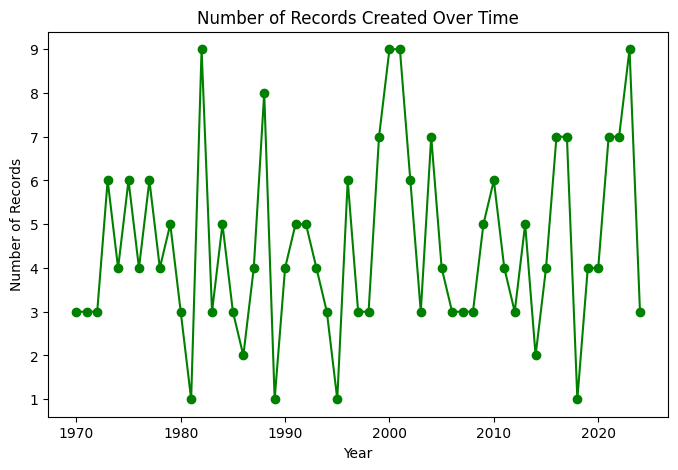

In [66]:
# Number of Records Created Over Time

table_1 = fakerDF.copy()
table_1['created_year'] = table_1['created_at'].map(lambda x : x.date().year)
created_counts = table_1['created_year'].value_counts().sort_index()

created_counts.plot(kind='line', marker='o', color='green', figsize=(8, 5))
plt.title('Number of Records Created Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Records')
plt.show()

Text(0.5, 1.0, 'Email domain count')

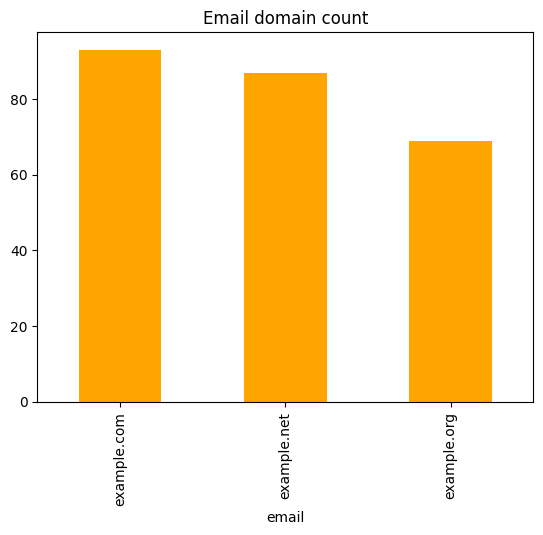

In [97]:
# Email domain count

table_2 = fakerDF.copy()

email_domains =  table_2['email'].map(lambda x : x.split('@')[1])
email_domains = email_domains.value_counts()

email_domains.plot(kind='bar', color='orange')
plt.title('Email domain count')

Text(0.5, 1.0, 'Top 10 Country Registered')

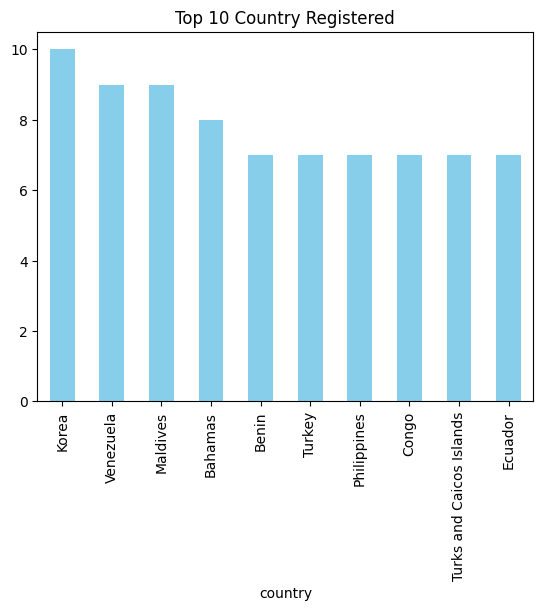

In [106]:
# Top 10 Country

table_3 = fakerDF.copy()

country_counts = table_3['country'].value_counts().sort_values(ascending=False).head(10)

country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Country Registered')

## CRYPTOCURRENCY VISUALIZATION

In [44]:
customDF = getDF(CUSTOM_TABLE)
customDF = customDF.sort_values('time')

customDF.head(10)

,time,ask,bid,last,symbols
353,2024-11-26 02:38:10,94636.070312,94636.062500,94641.359375,"[BTC, USD]"
258,2024-11-26 02:38:16,3445.209961,3445.199951,3447.350098,"[ETH, USD]"
291,2024-11-26 02:38:27,94622.703125,94622.687500,94622.703125,"[BTC, USD]"
254,2024-11-26 02:38:33,3445.750000,3445.739990,3445.219971,"[ETH, USD]"
311,2024-11-26 02:38:39,94641.398438,94641.390625,94641.632812,"[BTC, USD]"
33,2024-11-26 02:38:45,3446.120117,3446.110107,3446.129883,"[ETH, USD]"
381,2024-11-26 02:38:51,94630.367188,94628.640625,94629.132812,"[BTC, USD]"
517,2024-11-26 02:38:58,3444.110107,3444.010010,3446.129883,"[ETH, USD]"
504,2024-11-26 02:39:04,94641.398438,94641.390625,94628.648438,"[BTC, USD]"
57,2024-11-26 02:39:10,3443.540039,3443.479980,3446.129883,"[ETH, USD]"


Text(0.5, 1.0, 'BTC to USD')

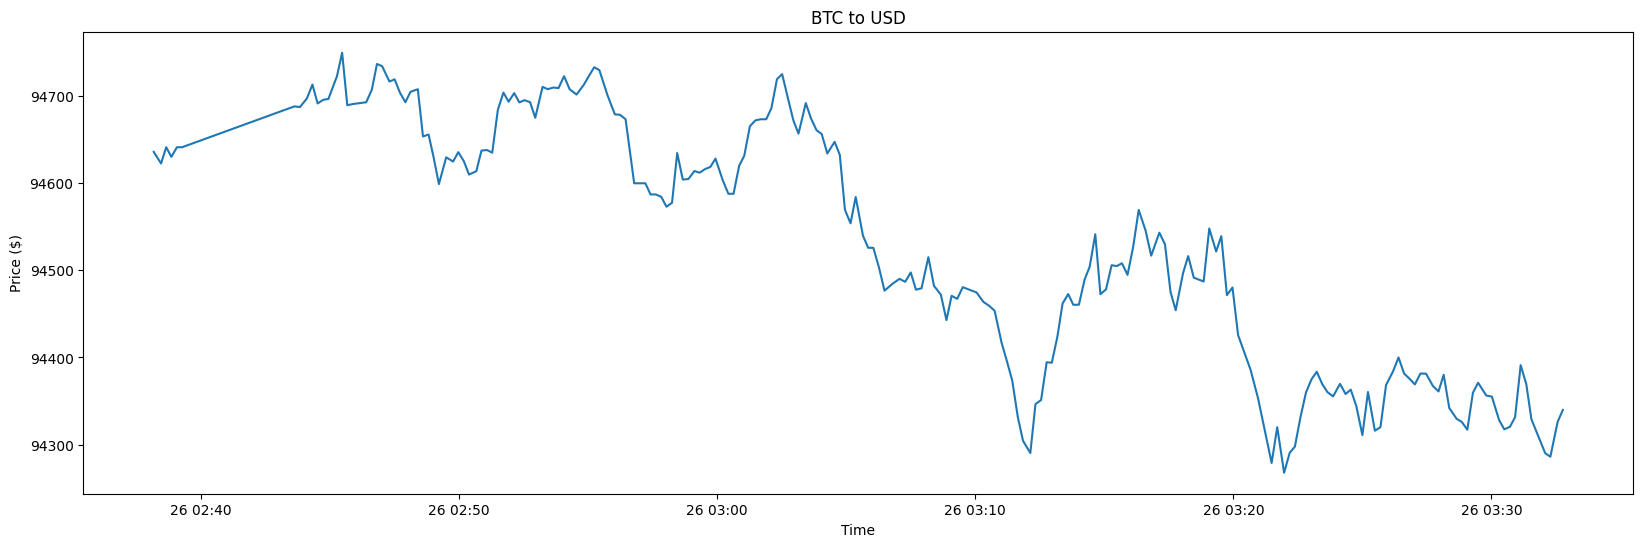

In [30]:
table1 = customDF[customDF['symbols'].map(lambda x : x[0] == 'BTC')]

plt.figure(figsize=(20,6))
plt.plot(table1['time'], table1['ask'])
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title(f'BTC to USD')

Text(0.5, 1.0, 'ETH to USD')

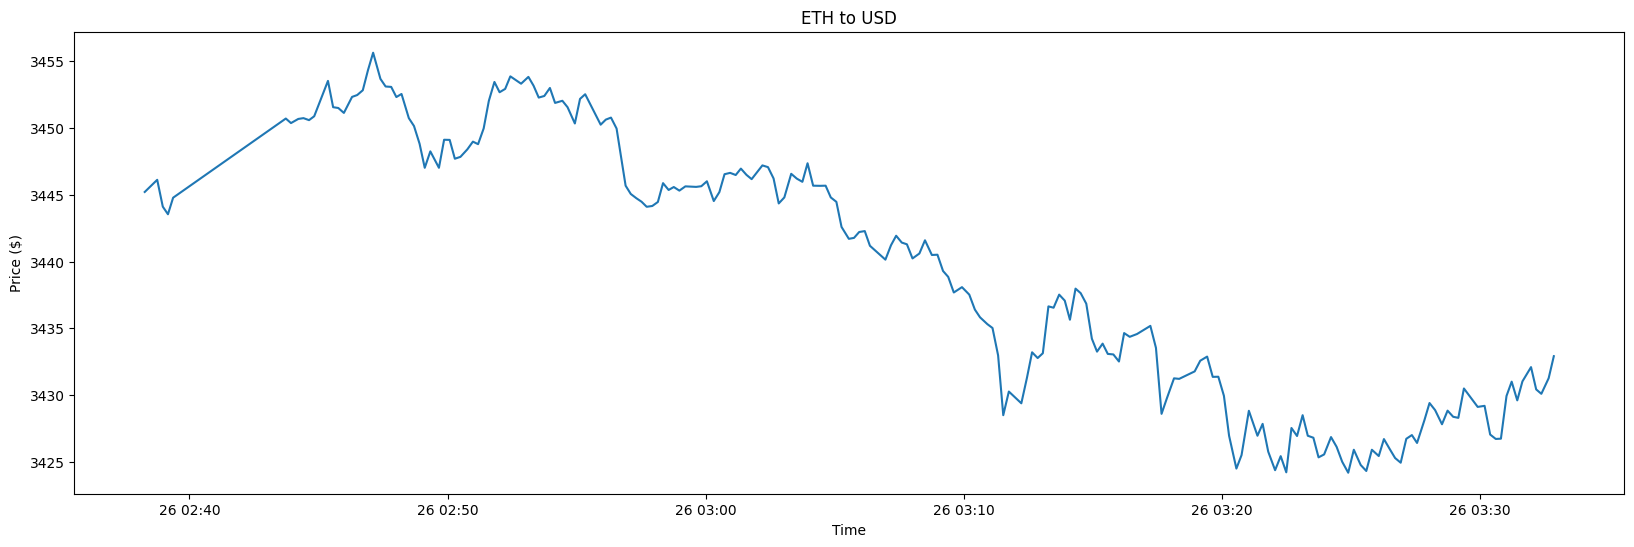

In [32]:
table2 = customDF[customDF['symbols'].map(lambda x : x[0] == 'ETH')]

plt.figure(figsize=(20,6))
plt.plot(table2['time'], table2['ask'])
plt.xlabel("Time")
plt.ylabel("Price ($)")
plt.title(f'ETH to USD')